# Ratio of Power Under Background to Under Gaussian

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as c
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
from scipy.optimize import curve_fit
import math
from statistics import stdev
from scipy.integrate import quad

def bin_it(yvalues,xvalues,binsize):
    '''puts an array into averaged bins of a given size'''
    N=int(math.ceil(len(yvalues)/binsize))
    C=0
    newy=[]
    while C<N:
        if (C+1)*binsize<len(yvalues):
            Q=(np.sum(yvalues[C*binsize:(C+1)*binsize]))/binsize
        else:
            Q=(np.sum(yvalues[C*binsize:len(yvalues)]))/binsize
        newy.append(Q)
        C+=1
    return np.array(newy),xvalues[0::binsize]

In [2]:
def bin_it(yvalues,xvalues,binsize):
    '''puts an array into averaged bins of a given size'''
    N=int(math.ceil(len(yvalues)/binsize))
    C=0
    newy=[]
    while C<N:
        if (C+1)*binsize<len(yvalues):
            Q=(np.sum(yvalues[C*binsize:(C+1)*binsize]))/binsize
        else:
            Q=(np.sum(yvalues[C*binsize:len(yvalues)]))/binsize
        newy.append(Q)
        C+=1
    return np.array(newy),xvalues[0::binsize]

In [3]:
def bin_ity(yvalues, binsize):
    N=int(math.ceil(len(yvalues) / binsize))
    #finds number of times code should loop, taking into acount the final group may be smaller than binsize
    C=0
    newy=[] #list for new y array
    while C<N:
        if (C+1)*binsize<len(yvalues): #if the end of the bin is still inside the orignal array
            Q=(np.sum(yvalues[C*binsize:(C+1)*binsize]))/binsize #group of binsize averaged
        else:
            Q=(np.sum(yvalues[C*binsize:len(yvalues)]))/binsize
            #if end of bin would be oustide the array use end of the array as the end of the bin
        newy.append(Q) 
        C+=1
    return np.array(newy)

In [4]:
#Adds random noise
def addnoise(pure):
    vary = np.random.uniform(0, 1, pure.shape)
    signal = -(pure* np.log(vary))
    return signal

In [5]:
def gausgran(x,height,centre,width):
    '''plots a gaussian acounting for granulation'''
    return height*np.exp((-(x-centre)**2)/(2*width**2))+fittedgran


In [6]:
def gausgran1(x,height,centre,width):
   '''plots a gaussian acounting for granulation'''
   return height*np.exp((-(x-centre)**2)/(2*width**2))+fittedgran[quater:3*quater]


In [7]:
def count(list1, l, r): 
    # x for x in list1 is same as traversal in the list 
    # the if condition checks for the number of numbers in the range  
    # l to r  
    # the return is stored in a list 
    # whose length is the answer 
    return len(list(x for x in list1 if l <= x <= r))

In [8]:
def findgran(x,y):
    #guess_vals=[np.max(y),y[round(len(y)/4)]]
    guess_vals=[5.84171514e+00, -1.99778025e-04]
    best_vals, covar =curve_fit(graneq, x, y,p0=guess_vals)
    return best_vals

In [9]:
def graneq(x,A,tau):
    '''equation to describe the background'''
    return A/(1+(2*np.pi*x*tau)**4)

In [10]:
def find_vmax(Fulldata,N,binsize, shot_noise_level):
    frequency=np.linspace(1,6000,6000)
    x = np.array(frequency)
    vmag = np.full((len(frequency)), shot_noise_level) #where 8 defines the apparent magnitude
    shot_noise = 18*10**(-0.4*(11.0-vmag))
    C=0
    fails=0
    centres=[]
    widths=[]
    amps=[]
    while C<N:
        y=addnoise(Fulldata+shot_noise) #adds noise to y values, inside loop so each curve fit will be different due to the random noise
        yb,xb=bin_it(y,x,binsize) #yb and xb as in xbinned and ybinned bins data with a binsize of 50
        best_vals=findgran(xb,yb)
        fittedgran=graneq(xb,best_vals[0],best_vals[1])
        #guess_vals=[np.max(yb),xb[0]+(xb[-1]-xb[0])/2,(xb[-1]-xb[0])/4] #rough guesses which will change with each plot
        guess_vals=[1,3100,300]
        #try and except are used in case a gaussian cant be fitted to the data. try and execpt allow the code to continue even if a
        #fit can not be found. If a fit can be found the v_max is recorded and added to an array of v_max values. If a fit can not
        #be found the failure is recored and the code continues with the next trial
        try: 
            best_vals, covar =curve_fit(gausgran, xb, yb,p0=guess_vals)
            #attempts to fit a gaussian to the data taking acount of the granulation
            centres.append(best_vals[1])
            amps.append(best_vals[0])
            widths.append(best_vals[2])
        except:
            fails+=1 #records failure
            C+=1
            continue
        C+=1
    percentage=fails*100/N
    print(f'Number of trials {N}, binsize: {binsize}, shot noise level {shot_noise_level}')
    print(f'{percentage}% trails failed to fit a gaussian') 
    if len(centres)<1: #prevents error in code
        print('Code failed to fit any gaussians ')
    else:   
        average_centres=np.mean(centres)
        difference=np.abs(average_centres-3100)
        print(f'average v_max {average_centres} which is {difference} away from the true value of 3100 ')
        print('')
        return np.mean(centres)

In [11]:
#Using the Gaussian as the height in the function to plot the Lorentzians
def lorentz_gauss(modes, Gauss, width):
    Lorentzh = np.zeros(len(x))
    for p in range(len(modes)):
        Lorentzh+=(Gauss*((1+((x - np.array(modes)[p])/(width/2))**2)**(-1)))
    Lorentzh_array = np.array(Lorentzh)
    return Lorentzh_array

In [12]:
#define parameters
delta_v_sun = 134.8 #microHz
D = 1.5
n=np.linspace(1,40,40)
l= 0
l1 = 1
l2 = 2
l3 = 3
width = 10

frequency=np.linspace(1,6000,6000)
x = np.array(frequency)
H=5
epsilon=1.5
V_max_sun = 3100 #microHz
A_max_sun = 2.1 #ppm from Warrick's paper

In [13]:
#calculate modes for different angular degree, l and radial mode, n
modes=[]
for i in range(len(n)):
    modes.append(delta_v_sun*(n[i]+((l)/2)+epsilon)-D*(l)*((l)+1))

modes1=[]
for i in range(len(n)):
    modes1.append(delta_v_sun*(n[i]+((l1)/2)+epsilon)-D*(l1)*((l1)+1))
    
modes2=[]
for i in range(len(n)):
    modes2.append(delta_v_sun*(n[i]+((l2)/2)+epsilon)-D*(l2)*((l2)+1))

modes3=[]
for i in range(len(n)):
    modes3.append(delta_v_sun*(n[i]+((l3)/2)+epsilon)-D*(l3)*((l3)+1))

#Defines Gaussian curve with height A squared
sigma = 2.123*delta_v_sun#microHz
Gauss = (A_max_sun**2)*(np.exp(-0.5*((x-V_max_sun)/sigma)**2))


#Defines parameters for granulation
tau_sun = 200 #seconds
g_sun = 274 #metres per second squared
T_eff_sun = 5777 #Kelvin
sigma_sun = 50000/(c.R_sun.value/(1000*10**3)) #ppm

granulation = (4*np.sqrt(2)*tau_sun/1e6*(sigma_sun)**2)/(1+(2*np.pi*x*tau_sun/1e6)**4) #ppm squared per micro hertz
#Defines width of the Lorentzians
alpha = -25.5+29.1 #for the Sun
gamma_alpha = 6.3 - 1.8 #for the Sun
linewidth = (alpha*np.log(x/V_max_sun)+np.log(gamma_alpha))


#Heights of modes scaled to their relative visibilities 
Lorentzh_array_0 = lorentz_gauss(modes, Gauss, linewidth)
Lorentzh_array_1 = lorentz_gauss(modes1, Gauss*1.5, linewidth)
Lorentzh_array_2 = lorentz_gauss(modes2, Gauss*0.5, linewidth)
Lorentzh_array_3 = lorentz_gauss(modes3, Gauss*0.04, linewidth)


In [14]:
#Plots the Lorentzians with the granulation as a full spectrum
plt.figure()
plt.plot(x, Lorentzh_array_0+granulation, 'c')
plt.plot(x, Lorentzh_array_1+granulation)
plt.plot(x, Lorentzh_array_2+granulation)
plt.plot(x, Lorentzh_array_3+granulation)
plt.title('Frequency-Power spectrum for the Sun with Granulation')
plt.xlabel('Frequency ($\mu$Hz)')
plt.ylabel('$Ppm^2$/$\mu$Hz')

Text(0, 0.5, '$Ppm^2$/$\\mu$Hz')

In [15]:
Osc = (Lorentzh_array_0 + Lorentzh_array_1 + Lorentzh_array_2 + Lorentzh_array_3)
G = granulation

shot_noises = []
min_mag = -1
max_mag = 13
nos = ((max_mag-min_mag)*4) +1
mags = np.linspace(min_mag, max_mag, nos) #(start, stop, no. outputs)
#print(mags)
for m in mags:
    vmag = np.full((6000), m) #here 8 defines the apparent magnitude
    shot_noises.append(18*10**(-0.4*(11.0-vmag)))

TotalSpec = []
for SNL in shot_noises:
    Spectrum = Osc + G + (SNL)
    TotalSpec.append(Spectrum)
#print(TotalSpec)

i = 27 #Indexing to plot a single graph of given vis mag
Solar_Comp = addnoise(TotalSpec[i])
plt.figure()


<Figure size 432x288 with 0 Axes>

Code is 25.0% complete
Code is 50.0% complete
Code is 75.0% complete
Code is 100.0% complete
No fails: 0
0.0% trails failed to fit a gaussian

average v_max 3092.944309079067 which is 7.0556909209331025 away from the true value of 3100 


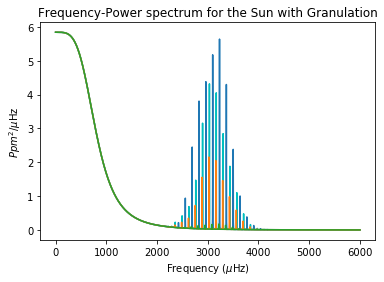

<Figure size 432x288 with 0 Axes>

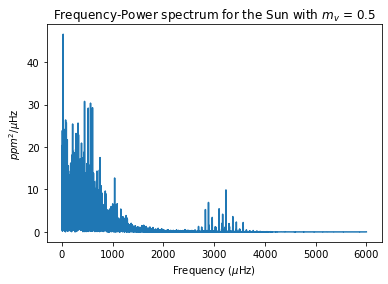

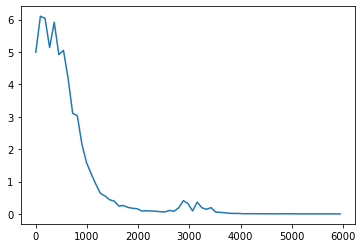

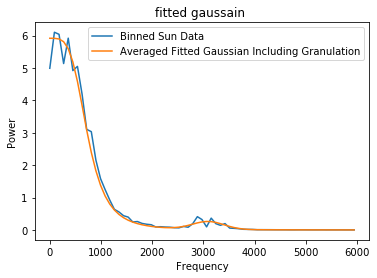

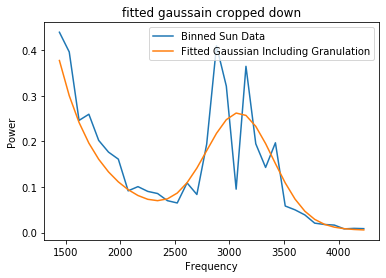

In [16]:
i = 6 #Indexing to plot a single graph of given vis mag
Solar_Comp = addnoise(TotalSpec[i])
plt.figure()

plt.plot(x, Solar_Comp)
plt.title(f'Frequency-Power spectrum for the Sun with $m_v$ = {mags[i]}')
plt.xlabel('Frequency ($\mu$Hz)')
plt.ylabel('$ppm^2$/$\mu$Hz')

#Fulldata is the modes and the granulation without noise as this needs to be added in each loop
#Fulldata=Lorentzh_array_0+Lorentzh_array_1+Lorentzh_array_2+Lorentzh_array_3+granulation #This is now TotalSpec
vmag = np.full((len(frequency)), -27) #here 8 defines the apparent magnitude
shot_noise = 18*10**(-0.4*(11.0-vmag))
best=findgran(frequency,TotalSpec[i])

frequency=np.linspace(1,6000,6000)
x = np.array(frequency)
binsize=90
C=0
Q=0
fails=0
centres=[]
widths=[]
amps=[]
N=4000 #number of trials to find v_max with differnt noise, 4000
while C<N:
    y=addnoise(TotalSpec[i]) #adds noise to y values, inside loop so each curve fit will be different due to the random noise
    yb,xb=bin_it(y,x,binsize) #yb and xb as in xbinned and ybinned bins data with a binsize of 50
    best_vals=findgran(xb,yb)
    fittedgran=graneq(xb,best_vals[0],best_vals[1])
    guess_vals=[np.max(yb),xb[0]+(xb[-1]-xb[0])/2,(xb[-1]-xb[0])/4] #rough guesses which will change with each plot
    #try and except are used in case a gaussian cant be fitted to the data. try and execpt allow the code to continue even if a
    #fit can not be found. If a fit can be found the v_max is recorded and added to an array of v_max values. If a fit can not
    #be found the failure is recored and the code continues with the next trial
    try: 
        best_vals, covar =curve_fit(gausgran, xb, yb,p0=guess_vals)
        #attempts to fit a gaussian to the data taking acount of the granulation
        '''section bellow can be used to look at indivudal results'''
        #if best_vals[1]<2400:
        #    if Q<2:
        #        plt.plot(xb,gausgran(xb,best_vals[0],best_vals[1],best_vals[2]))
        #        plt.plot(xb,yb)
        #        plt.axvline(best_vals[1],color='red')
        #        plt.show()
        #        Q+=1
    except:
        fails+=1 #records failure
        C+=1
        continue
    centres.append(best_vals[1])
    amps.append(best_vals[0])
    widths.append(best_vals[2])
    C+=1
    if C % (25*(N/100)) == 0:
        print(f'Code is {C/(N/100)}% complete') #if statment that allows tracking of code completion while it is running
percentage=fails*100/N
print(f'No fails: {fails}')
print(f'{percentage}% trails failed to fit a gaussian') 
if len(centres)<1: #prevents error is code
    print('Code failed to fit any gaussians ')
    print(fails)
else:   
    average_centres=np.mean(centres)
    difference=np.abs(average_centres-3100)
    print('')
    print(f'average v_max {average_centres} which is {difference} away from the true value of 3100 ')
    x_vals=bin_it(addnoise(TotalSpec[i]),x,binsize)[1]
    y_vals=bin_it(addnoise(TotalSpec[i]),x,binsize)[0]
    plt.figure()
    plt.plot(x_vals,y_vals, label='Binned Sun Data')
    
    plt.figure()
    plt.plot(x_vals,y_vals, label='Binned Sun Data')
    plt.plot(x_vals,gausgran(x_vals,np.mean(amps),np.mean(centres),np.mean(widths)), 
             label='Averaged Fitted Gaussian Including Granulation')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.title('fitted gaussain ')
    plt.legend()
    plt.show()
    
    plt.figure()
    quater=int(len(x_vals)/4)
    plt.plot(x_vals[quater:3*quater],y_vals[quater:3*quater], label='Binned Sun Data')
    plt.plot(x_vals[quater:3*quater],gausgran1(x_vals[quater:3*quater],np.mean(amps),np.mean(centres),np.mean(widths)),
            label='Fitted Gaussian Including Granulation')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.title('fitted gaussain cropped down')
    plt.legend()
    plt.show()


In [17]:
plt.figure()
plt.plot(x, granulation, label='Background')
plt.plot(x_vals, gausgran(x_vals,np.mean(amps),np.mean(centres),np.mean(widths)), label='Background with Gaussian')

def integrand_b(x, a, b):
    I = a/(1+(2*np.pi*x*b)**4)
    return I
a = best[0]
b = best[1]
Int_background = quad(integrand_b, 0, 6000, args=(a,b))
print(f'Power under background {Int_background}')

def integrand_g(x, a, b, c):
    I = a*np.exp((-(x-b)**2)/(2*c**2))
    return I 
a = np.mean(amps)
b = np.mean(centres)
c = np.mean(widths)

Int_gaus = quad(integrand_g, 0, 6000, args=(a,b,c))
print(f'Power under Gaussian {Int_gaus}')

ratio = Int_gaus[0]/Int_background[0]
print(f'Ratio of power under background to power under gaussian: {ratio}')

error = ratio*np.sqrt((Int_background[1]/Int_background[0])**2 + (Int_gaus[1]/Int_gaus[0])**2)
print(f'Error on the this ratio: {error}')


def full_gaus(x, a, b, c):
    G = a*np.exp((-(x-b)**2)/(2*c**2))
    return G

plt.plot(x, full_gaus(x, a, b, c), label='Full Gaussian')

plt.legend()




Power under background (5167.410869657337, 4.883009322408094e-10)
Power under Gaussian (188.7312100050173, 1.4854778537277957e-07)
Ratio of power under background to power under gaussian: 0.0365233604924341
Error on the this ratio: 2.8747043769177438e-11


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

%matplotlib qt 

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
f = np.arange(0.0, 6000, 1)
a0 = 2
v0= 3000
sig0 = 570
delta_f = 5.0
s = a0*(np.exp(-0.5*((f-v0)**2/sig0**2)))
l, = plt.plot(f, s, lw=2)
plt.plot(x_vals,y_vals, label='Binned Sun Data')
ax.margins(x=0)
axcolor = 'lightgoldenrodyellow'
axcent = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axsig = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
scentre = Slider(axcent, 'nu{max}', 0.1, 4000, valinit=v0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 2, valinit=a0)
ssig = Slider(axsig, 'Sigma', 0.1, 1000, valinit=sig0, valstep= delta_f)
def update(val):
    amp = samp.val
    cent = scentre.val
    sig = ssig.val
    l.set_ydata(amp*(np.exp(-0.5*((f-cent)**2/sig**2))))
    fig.canvas.draw_idle()
scentre.on_changed(update)
samp.on_changed(update)
ssig.on_changed(update)
resetax = plt.axes([0.8, 0.005, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
def reset(event):
    scentre.reset()
    samp.reset()
    ssig.reset()
button.on_clicked(reset)
rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('cyan', 'magenta', 'yellow'), active=0)
def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)


plt.show()


